# Virtual utility

## Case 1: LogNormal(mean,var)

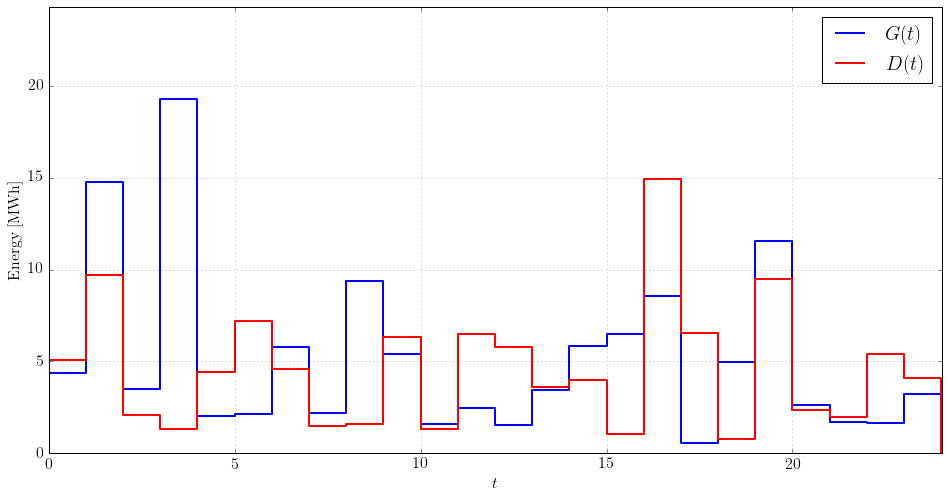

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from matplotlib import rc, rcParams
# Make use of TeX
plt.rc('text', usetex = True)
# Change all fonts to 'Computer Modern'
plt.rc('font', **{'family':'serif', 'serif':['Computer Modern']})

#Generation distribution
N_gen = np.random.lognormal(1.25,1,26)

#Consumption distribution
N_cons = np.zeros(26)
mu = [1,1,1,0.75,0.75,1,1,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.5,1.75,1.75,1.75,1.5,1,1,1,1]
var = [1,1,1,1,1,1,1,1.25,1.25,1,1,1,1,1,1,1,1.5,1.5,1.5,1.5,1.5,1,1,1,1]
for i in range(0, 25):
    N_cons[i] = np.random.lognormal(mu[i]*1.25,0.75*var[i])
    
#Balance: Surplus and deficit
B = N_gen - N_cons 
    
#Plot them all   
y = list(range(0, 26)) 
plt.figure(figsize=(16,8), dpi=600)
plt.tick_params(labelsize = 16)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('Energy [MWh]', fontsize=16)
plt.step(y,N_gen,'b', linewidth=2, label = "$G(t)$")  
plt.step(y,N_cons,'r', linewidth=2, label = "$D(t)$")
#plt.step(y,B,'k', linewidth=1.5, label = "$B(t)$")  
plt.axis([0,24+0.01,0*max(N_cons),max(N_gen)+5])
plt.grid(color='k', alpha=0.5, linestyle='dotted', linewidth=0.5)
plt.legend( loc=1, fontsize=20)
plt.savefig('gen-dem.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()

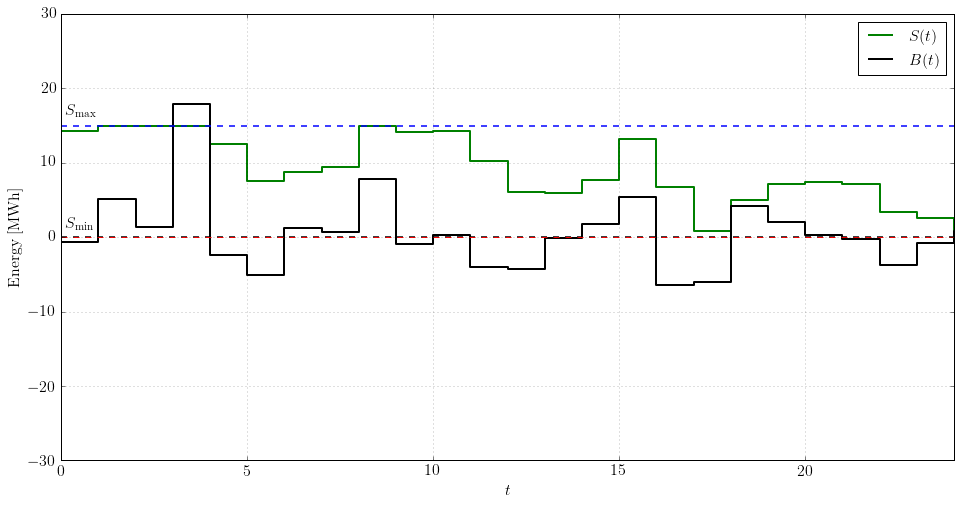

In [40]:
#Storage or generation
S = np.zeros(26)
#Storage
#Max and min storage
S_max=15
S_min=0
#Initial -random in the range
S[0]=np.random.uniform(S_min,S_max)
#Queue dynamics
for i in range(1, 25):
    S[i] = min(S_max,max(S_min,S[i-1]+B[i]))
#Plot incuding max and min
plt.figure(figsize=(16,8), dpi=600)
plt.tick_params(labelsize = 16)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('Energy [MWh]', fontsize=16)
plt.step(y,S,'g', linewidth=2, label = "$S(t)$")
plt.step(y,B,'k', linewidth=2, label = "$B(t)$")
plt.plot([0,25],[S_max,S_max],'b--', linewidth=1.5)
plt.plot([0,25],[0,0],'k--', linewidth=1.5) 
plt.plot([0,25],[S_min,S_min],'r--', linewidth=1)
plt.text(0.1, S_max+1, "$S_\mathrm{max}$", fontsize=16)
plt.text(0.1, S_min+1, "$S_\mathrm{min}$", fontsize=16)
#plt.axis([0,24,min(min(B)-10,0),max(max(B)+10,S_max)])
plt.axis([0,24,-30,30])
plt.grid(color='k', alpha=0.5, linestyle='dotted', linewidth=0.5)
plt.legend( loc=1, fontsize=16)
plt.savefig('storage.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()

## Probability distribution analysis

Derivation from this  [book](http://www.mhhe.com/engcs/electrical/papoulis/), pp.185, Exemple 6-9.

Let $f_{G(t)}(x)$ and $f_{D(t)}(y)$ denote the probability density functions of the independent random variables $G(t)\geq 0$ and $D(t)\geq 0$. Then, the cumulative distribution function $F_{B(t)}(z)$ of $B(t) = G(t) - D(t)$ is:

$\mathrm{Pr}\left[G(t) - D(t) \leq z\right] = F_{B(t)}(z) = {\displaystyle \int}_{y=0}^{\infty} \; {\displaystyle \int}_{x=0}^{z+y}  f_{G(t)}(x) \; f_{D(t)}(y) \;\; \mathrm{d}x \;\mathrm{d}y\;\;$ if $\;\;z\geq0$,

$\mathrm{Pr}\left[G(t) - D(t) \leq z\right] = F_{B(t)}(z) = {\displaystyle \int}_{y=-z}^{0} \; {\displaystyle \int}_{x=0}^{z+y}  f_{G(t)}(x) \; f_{D(t)}(y) \;\; \mathrm{d}x \;\mathrm{d}y\;\;$ if $\;\;z < 0$.

The probability density function $f_{B(t)}(y)$ is given by:

$f_{B(t)}(z) = {\displaystyle \int}_{y=0}^{\infty}   f_{G(t)}(z+y) \; f_{D(t)}(y)  \;\mathrm{d}y\;\;$ if $\;\;z\geq0$,

$f_{B(t)}(z) = {\displaystyle \int}_{y=-z}^{\infty}  f_{G(t)}(z+y) \; f_{D(t)}(y)  \;\mathrm{d}y\;\;$ if $\;\;z < 0$.

The probability that the system is self-sufficient is then:

$\mathrm{Pr}\left[ S_\text{min} - S(t-1) < B(t) \leq  S_\text{max} - S(t-1)  \right] = {\displaystyle \int}_{z = S_\text{min} - S(t-1)}^{z = S_\text{max} - S(t-1)} f_{B(t)}(z) \;\mathrm{d}z$.



**Example:** D(t) is Weibull, battery with capacity $S_\text{max} = 5$ kWh, and minimum level $S_\text{min} = 0$. The generation at $G(t+1) = G_{t+1} = 2$kWh (e.g. in a winter sunny day at 15:00)  is perfectly estimated by the weather forecast. The probability $p(S_t)$ of being self-sufficient in time $t+1$ as a function of the storage state $S(t) = S_t$ is given by: $ \mathrm{Pr}\left[G_{t+1} + S_t - S_\text{max} < D(t+1) \leq G_{t+1} - S_t - S_\text{min}\right]$. In this case we assume the following:  $\lambda = 2$ and $k=5$, given a mean of $\lambda\Gamma(1+1/k) \approx 2.1$ kWh.


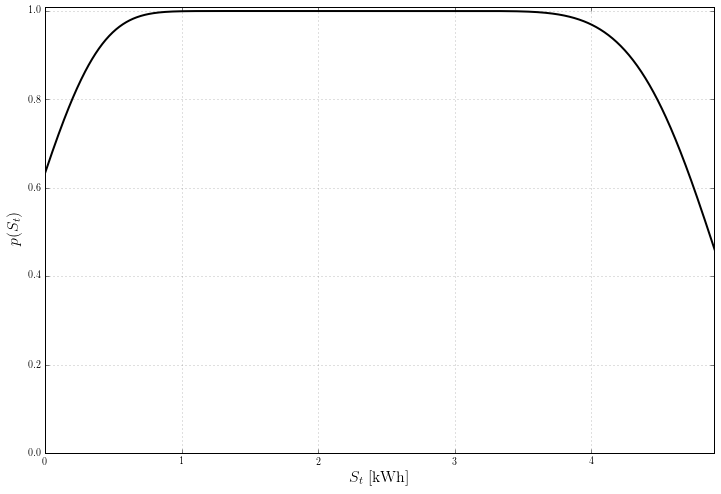

In [25]:
#Inputs
S_max=5
S_min=0
G_t_1= 2
lamb=2
k=5

#Storage possible states
steps=1000
S_t = np.linspace(S_min, S_max,steps) 
p_A = np.zeros(steps)
p_B = np.zeros(steps)
p = np.zeros(steps)
for i in range(0, steps-1):
    p_B[i] = np.exp(-((G_t_1 + S_t[i] - S_min)/lamb)**k) 
    if S_t[i] > S_max - G_t_1:
        p_A[i] = 1 - np.exp(-((G_t_1 + S_t[i] - S_max)/lamb)**k)    
    p[i] = 1- p_A[i] - p_B[i]





#Plot incuding max and min
plt.figure(figsize=(12,8), dpi=600)
plt.xlabel('$S_t$ [kWh]', fontsize=16)
plt.ylabel('$p(S_t)$', fontsize=16)
#plt.plot(S_t,p,'g--', linewidth=1)
#plt.plot(S_t,p_A,'r-', linewidth=1.5,label = "$p_A(S_t)$")
#plt.plot(S_t,p_B,'b-', linewidth=1.5,label = "$p_B(S_t)$")
plt.plot(S_t,p,'k-', linewidth=2,label = "$p(S_t)$")
#plt.axis([0,24,min(min(B)-10,0),max(max(B)+10,S_max)])
plt.axis([0,S_max-0.1,0,1+0.01])
plt.grid(color='k', alpha=0.5, linestyle='dotted', linewidth=0.5)
#plt.legend( loc=2, fontsize=16)
plt.savefig('prob-storage-weibull.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()